# Cardio Good Fitness Case Study
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. 

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cf = pd.read_csv('CardioGoodFitness.csv')

In [3]:
cf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
cf.shape

(180, 9)

In [5]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


No missing values in the dataset.

In [6]:
cf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [7]:
cf_copy = cf.copy()

In [8]:
#changing numerical categorical columns into category type object
for col in ['Education', 'Usage', 'Fitness']:
    cf_copy[col] = cf_copy[col].astype('category')

In [9]:
cf_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


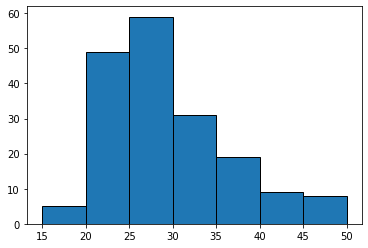

In [10]:
bins = [15,20,25,30,35,40,45,50]
plt.hist(cf_copy.Age, bins, edgecolor = 'black')
plt.show()

Maximum customars are from 20 to 30 years of Age group.

In [11]:
grouped_data = cf_copy.groupby(cf_copy.Product)
TM195_data = grouped_data.get_group('TM195')
TM498_data = grouped_data.get_group('TM498')
TM798_data = grouped_data.get_group('TM798')

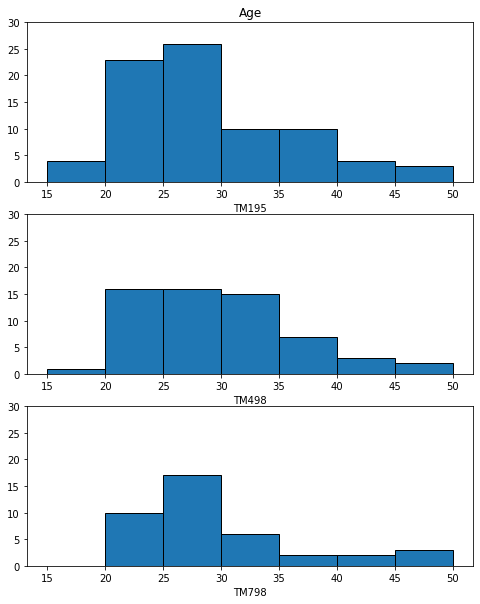

In [12]:
bins = [15,20,25,30,35,40,45,50]
plt.subplots(3,1 ,figsize = (8,10))
plt.subplot(311)
plt.title('Age')
plt.hist(TM195_data.Age,bins, edgecolor = 'black')
plt.ylim(0,30)
plt.xlabel('TM195')
plt.subplot(312)
plt.hist(TM498_data.Age,bins, edgecolor = 'black')
plt.ylim(0,30)
plt.xlabel('TM498')
plt.subplot(313)
plt.hist(TM798_data.Age,bins, edgecolor = 'black')
plt.ylim(0,30)
plt.xlabel('TM798')
plt.show()

Insights:

- 20 to 30 age group are the major buyers of TM195
- 20 to 35 age group are the major buyers of TM498
- 25 to 30 age group are the major buyers of TM798

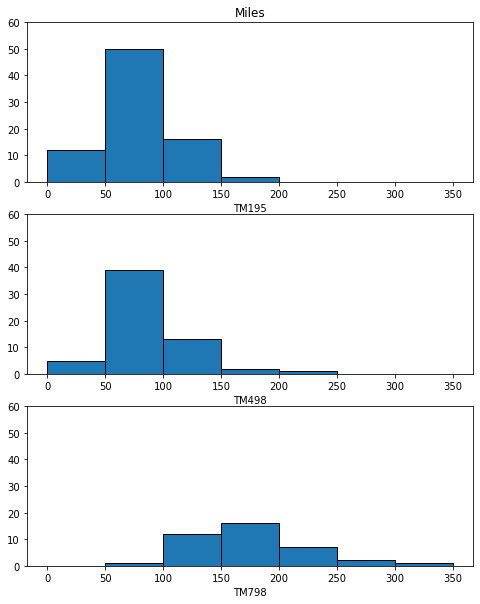

In [13]:
bins = range(0, 400, 50)
plt.subplots(3,1 ,figsize = (8,10))
plt.subplot(311)
plt.title('Miles')
plt.hist(TM195_data.Miles,bins, edgecolor = 'black')
plt.ylim(0,60)
plt.xlabel('TM195')
plt.subplot(312)
plt.hist(TM498_data.Miles,bins, edgecolor = 'black')
plt.ylim(0,60)
plt.xlabel('TM498')
plt.subplot(313)
plt.hist(TM798_data.Miles,bins, edgecolor = 'black')
plt.ylim(0,60)
plt.xlabel('TM798')
plt.show()

Insights:

- TM195 is bought by people who is planning to run upto 200 miles
- TM498 is bought by people who is planning to run upto 250 miles
- TM798 is bought by people who is planning to run upto 360 miles


inference:

- TM195 is a low end model, used by beginners and non-professionals
- TM498 is a medium range model
- TM798 is a high end model preferred by people planning to run more number of miles

C:\Users\Susanta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

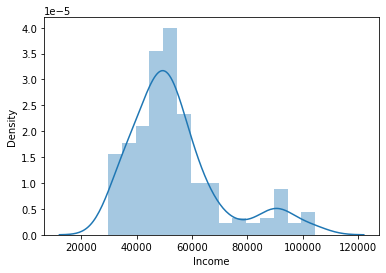

In [14]:
sns.distplot(cf_copy.Income)

C:\Users\Susanta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

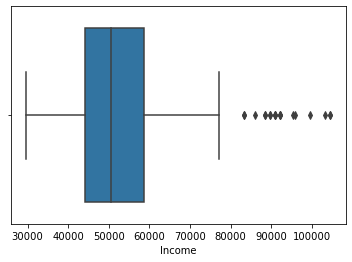

In [15]:
sns.boxplot(cf_copy.Income)

C:\Users\Susanta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Miles', ylabel='Density'>

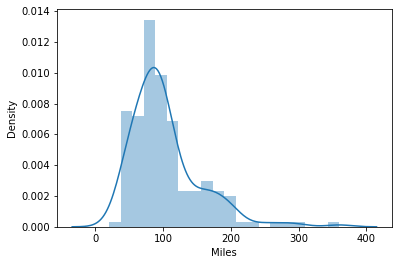

In [16]:
sns.distplot(cf_copy.Miles)

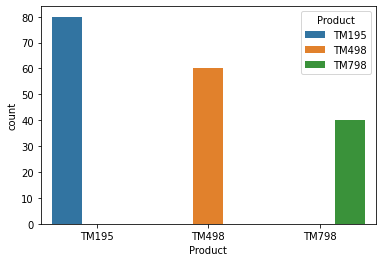

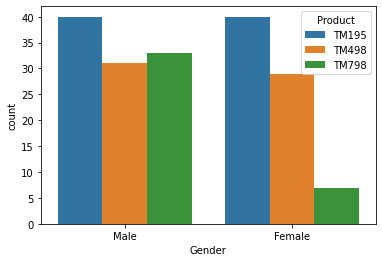

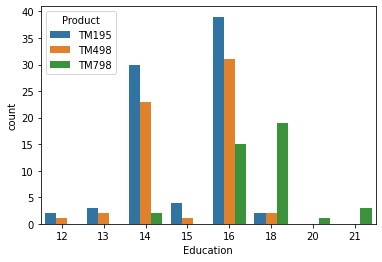

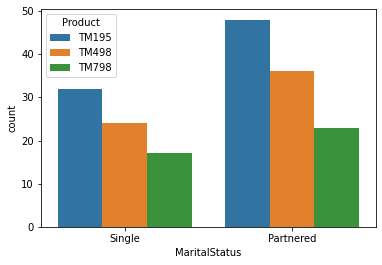

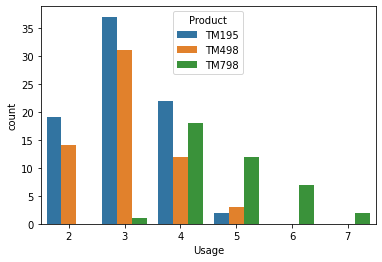

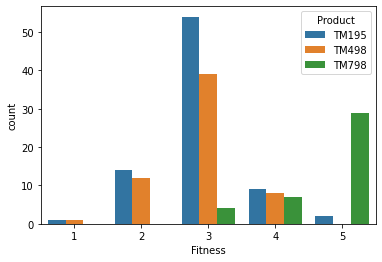

In [17]:
for i, predictor in enumerate(cf_copy.drop(columns=['Age','Income', 'Miles'])):
    plt.figure(i)
    sns.countplot(data=cf_copy, x=predictor, hue='Product')

Observation:
- TM195 is the higest selling product.
- Number of Female buyer is very less for TM798 product.
- Education 14 & 16 are the higest buyers of the TM 195 and 498 products.
- Buying rate of Married couples are more.
- TM195 is used by customers who are planning to use maximum from 2 to 4 times a week
- TM498 is used by customers who are planning to use maximum from 2 to 4 times a week
- TM798 is used by customers who are planning to use maximum from 4 to 6 times a week
- People having fitness level 3, are more likely to buy TM195 & TM498 models.
- People having fitness level 5, are more likely to buy TM798 model.

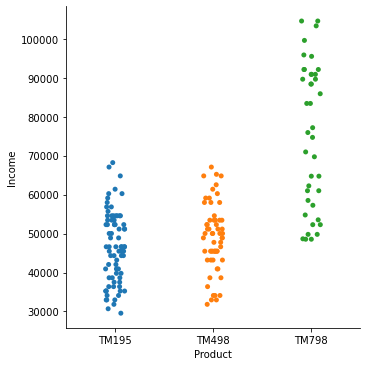

In [18]:
sns.catplot(x="Product", y="Income", data=cf_copy)

People having below 70K income are buying TM195 and TM498 Model. Higher income people buy TM798 Model.

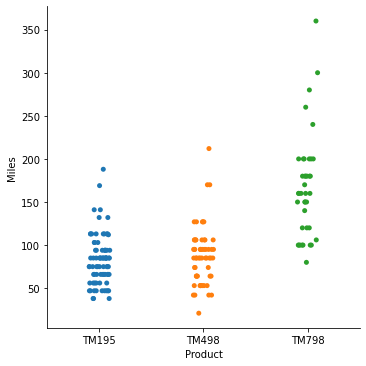

In [19]:
sns.catplot(x="Product", y="Miles", data=cf_copy)

People who runs more miles are buying TM798 model. 

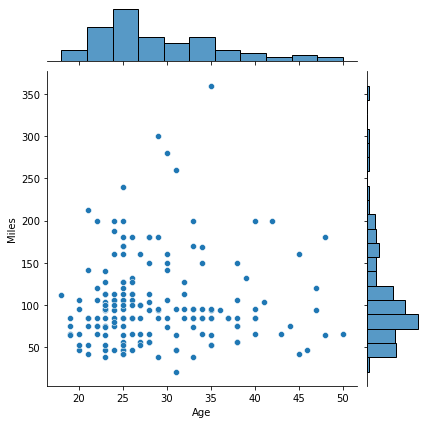

In [20]:
sns.jointplot(x='Age', y ='Miles', data = cf_copy)

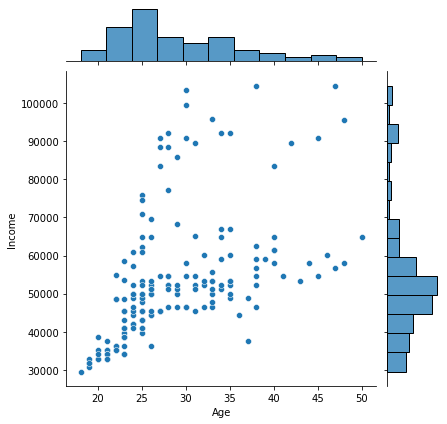

In [21]:
sns.jointplot(x='Age', y ='Income', data = cf_copy)

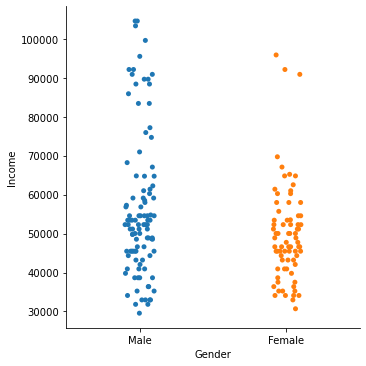

In [22]:
sns.catplot(x="Gender", y="Income", data=cf_copy)

Male customar having higher Income range than female.

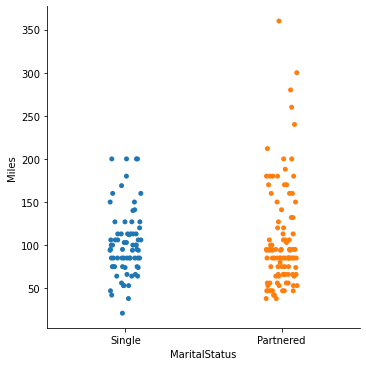

In [23]:
sns.catplot(x="MaritalStatus", y="Miles", data=cf_copy)

In [24]:
corr = cf.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

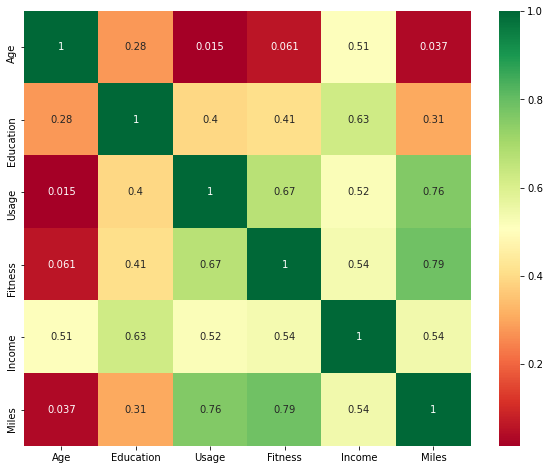

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

In [26]:
corr_1 = cf.corr()
round(corr_1, 2)

corr_list = corr_1.unstack()

In [27]:
# Listing top 10 correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

Age      Age          1.000000
Fitness  Miles        0.785702
Usage    Miles        0.759130
         Fitness      0.668606
Income   Education    0.625827
         Miles        0.543473
Fitness  Income       0.535005
Usage    Income       0.519537
Age      Income       0.513414
Fitness  Education    0.410581
Usage    Education    0.395155
dtype: float64

we can find high correlation between the following values:

 - Fitness & Miles
 - Usage & Miles
 - Usage & Fitness
 - Income & Education